# Baseline Linear Models

In [64]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
from types import SimpleNamespace

import os
import numpy as np

import dataset_utils
import helpers
import plots
import preprocessing
import train_utils
from implementations import (
    ridge_regression,
    mean_squared_error_gd,
    mean_squared_error_sgd,
    reg_logistic_regression,
    logistic_regression,
    logistic_regression_sgd,
    reg_logistic_regression_sgd,
    least_squares,
)
from naive_baselines import (
    random_guess,
    majority_guess,
)

In [4]:
N_DIM = 0
D_DIM = 1

Define hyperprameter domains

In [5]:
config = SimpleNamespace(
    seed=270404,
    sub_sample=True,
    algorithm=None,
    algorithm_hyperparams=dict(
        lambda_=np.logspace(-5, 0, 6),
        max_iters=np.arange(0, 1001, 200),
        gamma=np.logspace(-4, 0, 5),
    ),
    preconditioning_hyperparams=dict(
        categorical_subsets=[
            [[0, 1, 2, 3]],
        ],
        standardize=[True],
        nan_threshold_ratio=np.linspace(0.5, 0.9, 4),
        nan_replacement_type=["mean", "median"],
        extrema_clip_percentage=[0.],
        non_informative_threshold=[-1],
    ),
    feature_augmentation_hyperparams=dict(
        feature_augmentation=[False],
        poly_max_degree=[0],
        ihs=[False],
        sine=[False],
        sinh=[False],
        cosine=[False],
        cosh=[False],
        exp=[False],
        abs=[False],
    ),
    k_fold=10,
)

Preparing the data

In [6]:
# Data loading.
y_train, x_train, ids_train = helpers.load_csv_data(
    "../data/train.csv", sub_sample=config.sub_sample
)
_, x_test, ids_test = helpers.load_csv_data(
    "../data/test.csv", sub_sample=config.sub_sample
)
y_train = dataset_utils.from_11_to_01(y_train)

In [8]:
for algorithm in [
    random_guess,
    majority_guess,
    least_squares,
    ridge_regression,
    mean_squared_error_gd,
    mean_squared_error_sgd,
    logistic_regression,
    logistic_regression_sgd,
    reg_logistic_regression,
    reg_logistic_regression_sgd,
]:
    print(f"Working on algorithm {algorithm.__name__}")
    config.algorithm = algorithm
    # Train a model.
    results = train_utils.hyperparameter_sweep(y_train, x_train, config)

    train_utils.save_hyperparameter_sweep_results(
        algorithm=config.algorithm,
        results=results,
        output_dir="../results/baselines",
    )

    # Find the best hyperparameters.
    (
        best_hyperparams,
        best_mean_accuracy,
    ) = train_utils.pick_best_hyperparameters(results)
    print(
        f"Algorithm: {algorithm.__name__}\n"
        f"Best sweep accuracy: {best_mean_accuracy}.\n"
        f"Obtained for hyperparameters: {best_hyperparams}."
    )

Working on algorithm random_guess


100%|██████████| 8/8 [00:00<00:00, 23.87it/s]


Algorithm: random_guess
Best sweep accuracy: 0.48180000000000006.
Obtained for hyperparameters: {'categorical_subsets': [[0, 1, 2, 3]], 'standardize': True, 'nan_threshold_percentage': 0.5, 'nan_replacement_type': 'mean', 'extrema_clip_percentage': 0.0, 'non_informative_threshold': 1.0, 'feature_augmentation': False, 'poly_max_degree': 0, 'ihs': False, 'sine': False, 'sinh': False, 'cosine': False, 'cosh': False, 'exp': False, 'abs': False, 'seed': 270404, 'test_accuracies': [0.466, 0.482, 0.474, 0.466, 0.478, 0.49, 0.54, 0.476, 0.482, 0.464]}.
Working on algorithm majority_guess


100%|██████████| 8/8 [00:00<00:00, 26.11it/s]


Algorithm: majority_guess
Best sweep accuracy: 0.6714.
Obtained for hyperparameters: {'categorical_subsets': [[0, 1, 2, 3]], 'standardize': True, 'nan_threshold_percentage': 0.5, 'nan_replacement_type': 'mean', 'extrema_clip_percentage': 0.0, 'non_informative_threshold': 1.0, 'feature_augmentation': False, 'poly_max_degree': 0, 'ihs': False, 'sine': False, 'sinh': False, 'cosine': False, 'cosh': False, 'exp': False, 'abs': False, 'seed': 270404, 'test_accuracies': [0.646, 0.662, 0.702, 0.674, 0.678, 0.654, 0.644, 0.68, 0.674, 0.7]}.
Working on algorithm least_squares


100%|██████████| 8/8 [00:00<00:00, 19.89it/s]


Algorithm: least_squares
Best sweep accuracy: 0.7522.
Obtained for hyperparameters: {'categorical_subsets': [[0, 1, 2, 3]], 'standardize': True, 'nan_threshold_percentage': 0.7666666666666666, 'nan_replacement_type': 'median', 'extrema_clip_percentage': 0.0, 'non_informative_threshold': 1.0, 'feature_augmentation': False, 'poly_max_degree': 0, 'ihs': False, 'sine': False, 'sinh': False, 'cosine': False, 'cosh': False, 'exp': False, 'abs': False, 'seed': 270404, 'test_accuracies': [0.748, 0.712, 0.778, 0.748, 0.772, 0.772, 0.736, 0.746, 0.746, 0.764]}.
Working on algorithm ridge_regression


100%|██████████| 48/48 [00:02<00:00, 20.39it/s]


Algorithm: ridge_regression
Best sweep accuracy: 0.7532.
Obtained for hyperparameters: {'lambda_': 0.001, 'categorical_subsets': [[0, 1, 2, 3]], 'standardize': True, 'nan_threshold_percentage': 0.7666666666666666, 'nan_replacement_type': 'median', 'extrema_clip_percentage': 0.0, 'non_informative_threshold': 1.0, 'feature_augmentation': False, 'poly_max_degree': 0, 'ihs': False, 'sine': False, 'sinh': False, 'cosine': False, 'cosh': False, 'exp': False, 'abs': False, 'seed': 270404, 'test_accuracies': [0.748, 0.714, 0.784, 0.76, 0.77, 0.774, 0.728, 0.748, 0.746, 0.76]}.
Working on algorithm mean_squared_error_gd


 32%|███▏      | 77/240 [00:20<01:17,  2.10it/s]/Users/skander/courses/epfl/ml-project-1-lms/linear_regression_utils.py:21: RuntimeWarning: overflow encountered in square
  return (e**2).mean() / 2
/Users/skander/miniforge3/envs/cs433-p1-lms/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
 49%|████▉     | 117/240 [00:57<01:58,  1.04it/s]/Users/skander/courses/epfl/ml-project-1-lms/linear_regression_utils.py:35: RuntimeWarning: overflow encountered in matmul
  return -tx.T @ (y - tx @ w) / len(y)
/Users/skander/courses/epfl/ml-project-1-lms/linear_regression_utils.py:35: RuntimeWarning: invalid value encountered in matmul
  return -tx.T @ (y - tx @ w) / len(y)
100%|██████████| 240/240 [04:46<00:00,  1.19s/it]


Algorithm: mean_squared_error_gd
Best sweep accuracy: 0.7541999999999999.
Obtained for hyperparameters: {'max_iters': 200, 'gamma': 0.1, 'categorical_subsets': [[0, 1, 2, 3]], 'standardize': True, 'nan_threshold_percentage': 0.7666666666666666, 'nan_replacement_type': 'mean', 'extrema_clip_percentage': 0.0, 'non_informative_threshold': 1.0, 'feature_augmentation': False, 'poly_max_degree': 0, 'ihs': False, 'sine': False, 'sinh': False, 'cosine': False, 'cosh': False, 'exp': False, 'abs': False, 'seed': 270404, 'test_accuracies': [0.752, 0.708, 0.782, 0.76, 0.776, 0.766, 0.728, 0.748, 0.754, 0.768]}.
Working on algorithm mean_squared_error_sgd


 63%|██████▎   | 152/240 [00:11<00:11,  7.71it/s]/Users/skander/courses/epfl/ml-project-1-lms/implementations.py:79: RuntimeWarning: overflow encountered in subtract
  w -= gamma * gradient
/Users/skander/courses/epfl/ml-project-1-lms/implementations.py:79: RuntimeWarning: invalid value encountered in subtract
  w -= gamma * gradient
100%|██████████| 240/240 [00:22<00:00, 10.57it/s]


Algorithm: mean_squared_error_sgd
Best sweep accuracy: 0.734.
Obtained for hyperparameters: {'max_iters': 600, 'gamma': 0.01, 'categorical_subsets': [[0, 1, 2, 3]], 'standardize': True, 'nan_threshold_percentage': 0.7666666666666666, 'nan_replacement_type': 'median', 'extrema_clip_percentage': 0.0, 'non_informative_threshold': 1.0, 'feature_augmentation': False, 'poly_max_degree': 0, 'ihs': False, 'sine': False, 'sinh': False, 'cosine': False, 'cosh': False, 'exp': False, 'abs': False, 'seed': 270404, 'test_accuracies': [0.724, 0.712, 0.756, 0.734, 0.756, 0.734, 0.716, 0.702, 0.736, 0.77]}.
Working on algorithm logistic_regression


100%|██████████| 240/240 [05:03<00:00,  1.27s/it]


Algorithm: logistic_regression
Best sweep accuracy: 0.756.
Obtained for hyperparameters: {'max_iters': 400, 'gamma': 1.0, 'categorical_subsets': [[0, 1, 2, 3]], 'standardize': True, 'nan_threshold_percentage': 0.7666666666666666, 'nan_replacement_type': 'median', 'extrema_clip_percentage': 0.0, 'non_informative_threshold': 1.0, 'feature_augmentation': False, 'poly_max_degree': 0, 'ihs': False, 'sine': False, 'sinh': False, 'cosine': False, 'cosh': False, 'exp': False, 'abs': False, 'seed': 270404, 'test_accuracies': [0.77, 0.71, 0.768, 0.75, 0.782, 0.776, 0.726, 0.74, 0.766, 0.772]}.
Working on algorithm logistic_regression_sgd


100%|██████████| 240/240 [00:24<00:00,  9.95it/s]


Algorithm: logistic_regression_sgd
Best sweep accuracy: 0.7384000000000001.
Obtained for hyperparameters: {'max_iters': 1000, 'gamma': 0.01, 'categorical_subsets': [[0, 1, 2, 3]], 'standardize': True, 'nan_threshold_percentage': 0.7666666666666666, 'nan_replacement_type': 'median', 'extrema_clip_percentage': 0.0, 'non_informative_threshold': 1.0, 'feature_augmentation': False, 'poly_max_degree': 0, 'ihs': False, 'sine': False, 'sinh': False, 'cosine': False, 'cosh': False, 'exp': False, 'abs': False, 'seed': 270404, 'test_accuracies': [0.728, 0.71, 0.764, 0.732, 0.766, 0.722, 0.712, 0.724, 0.754, 0.772]}.
Working on algorithm reg_logistic_regression


 88%|████████▊ | 1272/1440 [26:25<01:51,  1.51it/s]/Users/skander/courses/epfl/ml-project-1-lms/logistic_regression_utils.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))
 91%|█████████ | 1312/1440 [27:03<02:25,  1.14s/it]/Users/skander/courses/epfl/ml-project-1-lms/logistic_regression_utils.py:34: RuntimeWarning: overflow encountered in exp
  loss = -y.T.dot(pred) / N + np.mean(np.log(1 + np.exp(pred)))
100%|██████████| 1440/1440 [31:22<00:00,  1.31s/it]


Algorithm: reg_logistic_regression
Best sweep accuracy: 0.7562.
Obtained for hyperparameters: {'lambda_': 0.0001, 'max_iters': 600, 'gamma': 1.0, 'categorical_subsets': [[0, 1, 2, 3]], 'standardize': True, 'nan_threshold_percentage': 0.7666666666666666, 'nan_replacement_type': 'median', 'extrema_clip_percentage': 0.0, 'non_informative_threshold': 1.0, 'feature_augmentation': False, 'poly_max_degree': 0, 'ihs': False, 'sine': False, 'sinh': False, 'cosine': False, 'cosh': False, 'exp': False, 'abs': False, 'seed': 270404, 'test_accuracies': [0.77, 0.71, 0.77, 0.75, 0.782, 0.776, 0.726, 0.74, 0.766, 0.772]}.
Working on algorithm reg_logistic_regression_sgd


100%|██████████| 1440/1440 [02:38<00:00,  9.06it/s]


Algorithm: reg_logistic_regression_sgd
Best sweep accuracy: 0.7384000000000001.
Obtained for hyperparameters: {'lambda_': 1e-05, 'max_iters': 1000, 'gamma': 0.01, 'categorical_subsets': [[0, 1, 2, 3]], 'standardize': True, 'nan_threshold_percentage': 0.7666666666666666, 'nan_replacement_type': 'median', 'extrema_clip_percentage': 0.0, 'non_informative_threshold': 1.0, 'feature_augmentation': False, 'poly_max_degree': 0, 'ihs': False, 'sine': False, 'sinh': False, 'cosine': False, 'cosh': False, 'exp': False, 'abs': False, 'seed': 270404, 'test_accuracies': [0.728, 0.71, 0.764, 0.732, 0.766, 0.722, 0.712, 0.724, 0.754, 0.772]}.


## Get baselines boxplots

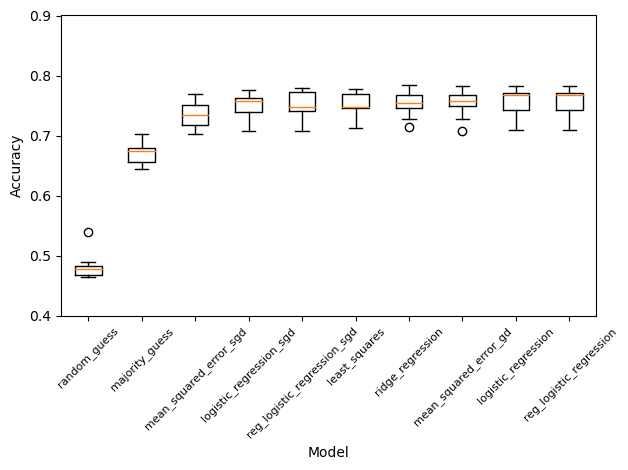

In [72]:
baselines_dir = "../results/baselines"
paths_to_models = []
for filename in os.listdir(baselines_dir):
    if filename[-4:] != '.csv':
        paths_to_models.append(os.path.join(baselines_dir, filename))

output_path = "../figures/baseline_accuracies.png"

plots.plot_models_accuracy(
    paths_to_models=paths_to_models, 
    output_path=output_path,
    x_label_rotation=45,
    y_range=[0.4, 0.9]
    )

## Get hyperparameter (lambda) sweep figure

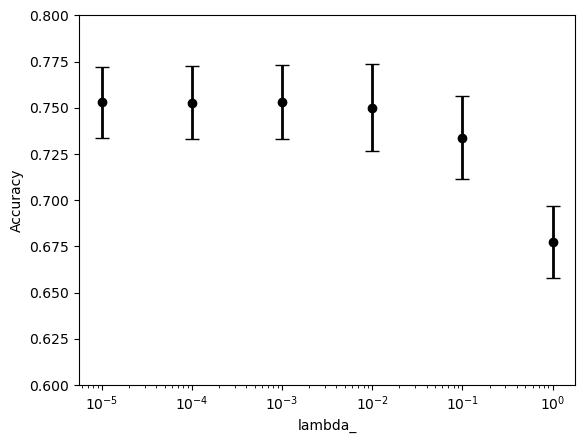

In [73]:
hyperparameter_sweep_file_path = "../results/baselines/ridge_regression.pkl"
results = train_utils.load_hyperparameter_sweep_results(hyperparameter_sweep_file_path)

# Parameter which we are going to sweep
swept_hyperparameter = "lambda_"

# Prepare fixed hyperparameters
(best_hyperparams, best_mean_accuracy,) = train_utils.pick_best_hyperparameters(results)
fixed_hyperparameters = best_hyperparams
del best_hyperparams[swept_hyperparameter]
del best_hyperparams['test_accuracies']


output_path = "../figures/sweep_lambda_ridge_regression.png"

plots.plot_sweep_over_hyperparam(file_path=hyperparameter_sweep_file_path,
    swept_hyperparameter=swept_hyperparameter, 
    fixed_hyperparameters=fixed_hyperparameters, 
    output_path=output_path,
    y_range=[0.6, 0.8]
    )